In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

# Importing the necessary libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [4]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [5]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



# Data Visualization & Preprocessing

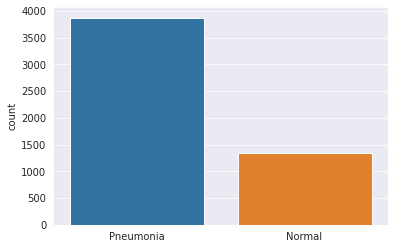

In [6]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)        

**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

Text(0.5, 1.0, 'NORMAL')

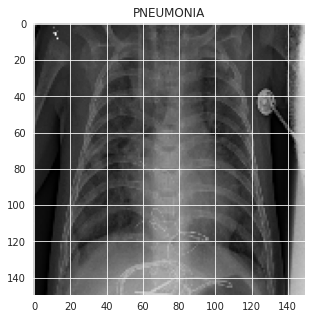

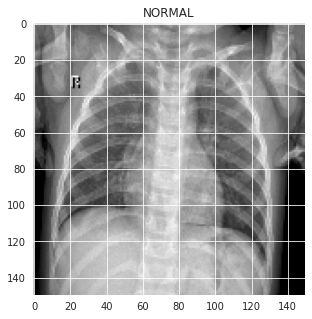

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [8]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [9]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [10]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Veri yolları
normal_dir = '../input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/'
pneumonia_dir = '../input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/'


# Veri yolları


# Veri setlerini yükleme ve ayrıştırma (train ve test)
normal_images = [os.path.join(normal_dir, fname) for fname in os.listdir(normal_dir)]
pneumonia_images = [os.path.join(pneumonia_dir, fname) for fname in os.listdir(pneumonia_dir)]

# Eğitim ve test setlerini ayırma
normal_train, normal_test = train_test_split(normal_images, test_size=0.2, random_state=42)
pneumonia_train, pneumonia_test = train_test_split(pneumonia_images, test_size=0.2, random_state=42)

# Eğitim verilerini dengeleme (normal sınıfı artırma)
train_images = pneumonia_train + normal_train
train_labels = [1] * len(pneumonia_train) + [0] * len(normal_train)

# Data augmentation işlemleri
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Veri artırma işlemi için örnek fonksiyon (sadece normal sınıf için)
def augment_normal_data(images, labels):
    augmented_images = []
    augmented_labels = []
    for img, label in zip(images, labels):
        if label == 0:  # Sadece normal sınıfı artırıyoruz
            image = tf.keras.preprocessing.image.load_img(img, target_size=(150, 150))
            image = tf.keras.preprocessing.image.img_to_array(image)
            image = np.expand_dims(image, axis=0)
            
            i = 0
            for batch in datagen.flow(image, batch_size=1):
                augmented_images.append(batch[0].astype('uint8'))
                augmented_labels.append(label)
                i += 1
                if i >= 1:  # Her bir normal resim için 5 adet yeni örnek oluşturuyoruz
                    break
    return np.array(augmented_images), np.array(augmented_labels)

# Normal sınıfın artırılması
augmented_images, augmented_labels = augment_normal_data(normal_train, [0] * len(normal_train))

# Orijinal ve artırılmış verileri birleştirme
train_images_array = np.array([tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=(150, 150))) for img in train_images])
train_images_array = np.concatenate((train_images_array, augmented_images), axis=0)
train_labels_array = np.concatenate((train_labels, augmented_labels), axis=0)

# Verileri shuffle yapma
indices = np.arange(train_images_array.shape[0])
np.random.shuffle(indices)
train_images_array = train_images_array[indices]
train_labels_array = train_labels_array[indices]

# Sonuç olarak dengelenmiş eğitim verileri
print(f"Augmented train images shape: {train_images_array.shape}")
print(f"Augmented train labels shape: {train_labels_array.shape}")


Augmented train images shape: (3219, 150, 150, 3)
Augmented train labels shape: (3219,)


For the data augmentation, i choosed to :
1. Randomly rotate some training images by 30 degrees 
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width 
4. Randomly shift images vertically by 10% of the height 
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

In [37]:
from tabulate import tabulate
def TotalImages(path, labels):
    data = []

    for label in labels:
        image_directory = os.path.join(path, label)
        num_images = len([name for name in os.listdir(image_directory) if name.endswith('.jpeg')])
        data.append([label, num_images])
        
    # Create the table using tabulate
    table = tabulate(data, headers=["Label", "Number of Images"], tablefmt="fancy_grid")

    # Print the table
    print(table)

# Kullanım
train_path = '../input/chest-xray-pneumonia/chest_xray/chest_xray/train'
val_path = '../input/chest-xray-pneumonia/chest_xray/chest_xray/val'
labels = ['NORMAL', 'PNEUMONIA']

# Toplam görüntü sayısını yazdırma
TotalImages(train_path, labels)
TotalImages(val_path, labels)


╒═══════════╤════════════════════╕
│ Label     │   Number of Images │
╞═══════════╪════════════════════╡
│ NORMAL    │               1341 │
├───────────┼────────────────────┤
│ PNEUMONIA │               3875 │
╘═══════════╧════════════════════╛
╒═══════════╤════════════════════╕
│ Label     │   Number of Images │
╞═══════════╪════════════════════╡
│ NORMAL    │                  8 │
├───────────┼────────────────────┤
│ PNEUMONIA │                  8 │
╘═══════════╧════════════════════╛


# Training the Model

In [38]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 38, 38, 64)       

In [40]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping ve ReduceLROnPlateau callback'leri
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [41]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=12,
    validation_data=datagen.flow(x_val, y_val),
    callbacks=[learning_rate_reduction, early_stopping]
)

Epoch 1/12
163/163 [==============================] - 258s 2s/step - loss: 0.4781 - accuracy: 0.8290 - val_loss: 54.4053 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 257s 2s/step - loss: 0.3239 - accuracy: 0.8794 - val_loss: 42.0575 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 256s 2s/step - loss: 0.2645 - accuracy: 0.9013 - val_loss: 19.1111 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/12
163/163 [==============================] - 256s 2s/step - loss: 0.1767 - accuracy: 0.9363 - val_loss: 36.3268 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - 257s 2s/step - loss: 0.1566 - accuracy: 0.9400 - val_loss: 2.0309 - val_accuracy: 0.6250
Epoch 6/12
163/163 [==============================] - 257s 2s/step - loss: 0.1581 - accuracy: 0.9473 - val_loss: 53.6354 - val_accuracy: 0.5000
Epoch 7/12
163/163 [==============================] - 25

In [42]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

624/624 [==============================] - 9s 14ms/step
Loss of the model is -  0.31802734121298176
624/624 [==============================] - 8s 13ms/step
Accuracy of the model is -  89.10256624221802 %


# Analysis after Model Training

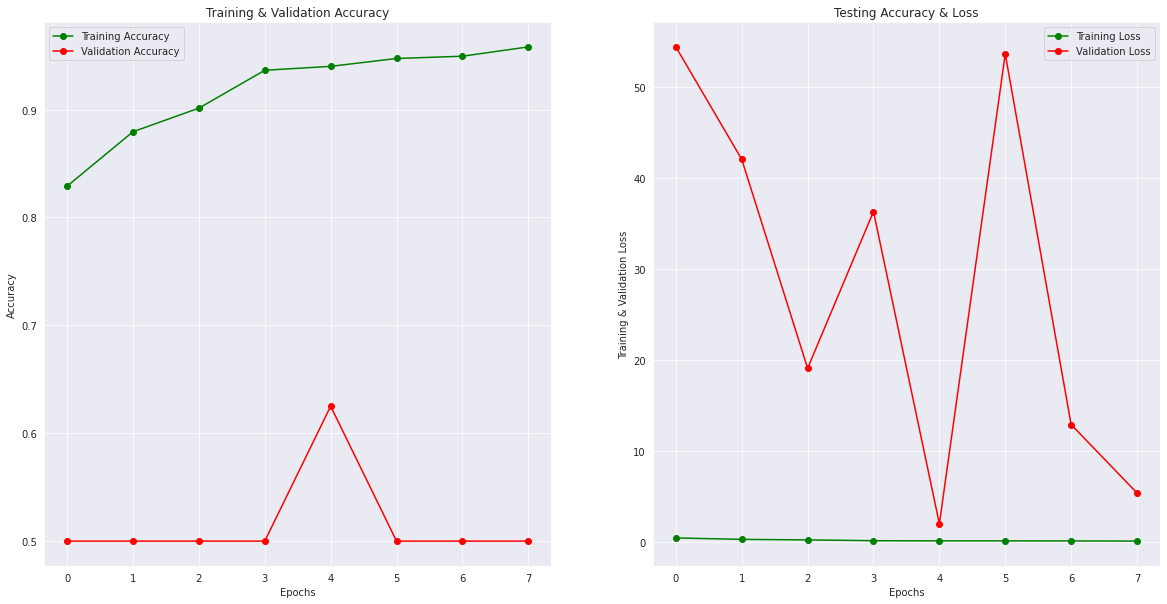

In [53]:
epochs = [i for i in range(8)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [44]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [45]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.87      0.97      0.92       390
   Normal (Class 1)       0.93      0.76      0.84       234

           accuracy                           0.89       624
          macro avg       0.90      0.87      0.88       624
       weighted avg       0.90      0.89      0.89       624



In [46]:
cm = confusion_matrix(y_test,predictions)
cm

array([[377,  13],
       [ 55, 179]])

In [48]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

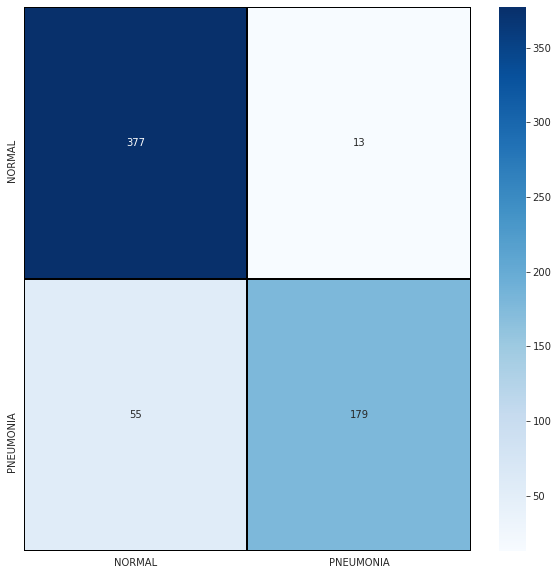

In [49]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [50]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

**Some of the Correctly Predicted Classes**

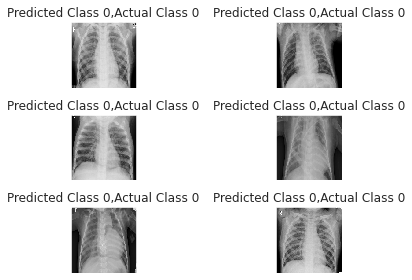

In [51]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

**Some of the Incorrectly Predicted Classes**

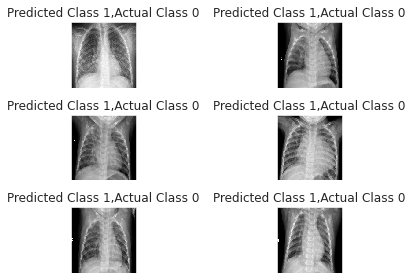

In [52]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1